# **Module 3: Linear Regression**

Linear regression models linear relationships of the form: 

$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n $

Where Y is the response variable, the $X_n$ are predictor variables and the $\beta_n$ are the coefficients. 

Linear regression is the best choice of model when the following assumptions are met: 
- **Linearity:** the relationship between the response and predictor variables is linear
- **Independence & Normality of Errors:** observations are independent of each other and errors are normally distributed
- **No Multicollinearity:** the predictor variables are not highly correlated with each other 

It can still be useful when these assumptions are not perfectly met, but may no longer be the best choice of model. In this module we will cover some methods, such as variable transformation and model selection that can address deviations from these assumptions. 

In [8]:
# Import Packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## Boston Housing Dataset

For this exercise we will be using the Boston Housing Dataset downloaded from https://github.com/selva86/datasets/blob/master/BostonHousing.csv.  

We will be attempting to predict medv based on the other variables. Therefore medv will be our **response variable** (also called y) and the other variables will be the **predictor variables**
(also referred to as x).

These are descriptions of the dataset columns:

CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town.\
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\
PTRATIO - pupil-teacher ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT - % lower status of the population\
MEDV - Median value of owner-occupied homes in $1000's\

In [9]:
# Read in housing dataset
housing_df = pd.read_csv("BostonHousing.csv")
housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## What Variables Will be Good Predictors
We could blindly run a model with all of the predictor variables, but first it is good to check which variable are correlated to the response. Since this is a linear model, we will be looking for linear correlation using Pearson Correlation Coefficients. 

We will check correlation using the .corr() method which produces Pearson Correlation Coefficients.

In [10]:
#Look at the corelation matrix 
cor_matrix = round(housing_df.corr(),3) #run correlation matrix and round to three decimal places
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).format("{:.3f}") #produce correlation matrix table with 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
zn,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
indus,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
chas,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
nox,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
rm,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
age,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
dis,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
rad,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
tax,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


All of our variables have at least a weak correlation to medv, and may be helpful in predicting medv. \


## Variable Transformations 

Linear regression works best when the predictor variables have balanced distributions (resulting in normally distributed errors) and linear relationships to the response variable. If the variable itself does not have these characteristics, a transformation of (for example the natural logarithm) of the variable often will.

In this section, we will look use histograms to evaluate if the variables have a balanced distributions (equal amounts of data on both sides of the mean) and scatter plots of the response variable vs the predictor variable to see if the relationship is linear. Then we will try apply appropriate transformations to improve the distributions where possible. 

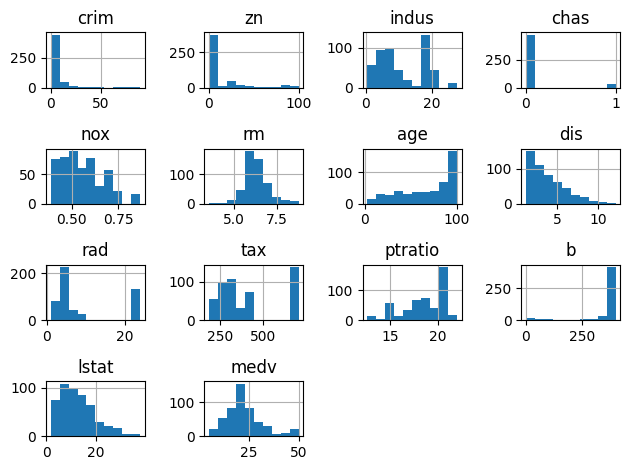

In [11]:
#Look at the Histograms 
housing_df.hist(bins = 10)
plt.tight_layout()
plt.show()

### Skewed Distributions 
Several of our variables have very skewed distributions. This means that many of the data points are closely grouped on one side of the distribution while the rest are far to one side. Take crim and zn, for example. The majority of the data points are close to zero, but they both have what we call long right-hand tails where a few data points are scattered far too the right. These points **skew the data right** because they cause the mean of the data to be much higher than (to the right of) the mode (where most of the data is located). This is problematic because these right-hand points end up having undue influence on the model's predictions. Any error in these points is exaggerated and they become what we call **leverage points**, points that if removed would drastically change the model. 

To learn more about this concept, watch this video from Kahn academy and pay attention to what happens when we have outliers far away from the mean. A data point being far from the mean won't always be an outlier, but when it is, the effect can be detrimental. This is why we like to try and balance our data.

 https://www.youtube.com/watch?v=jHHPGhrcMOY&ab_channel=KhanAcademy

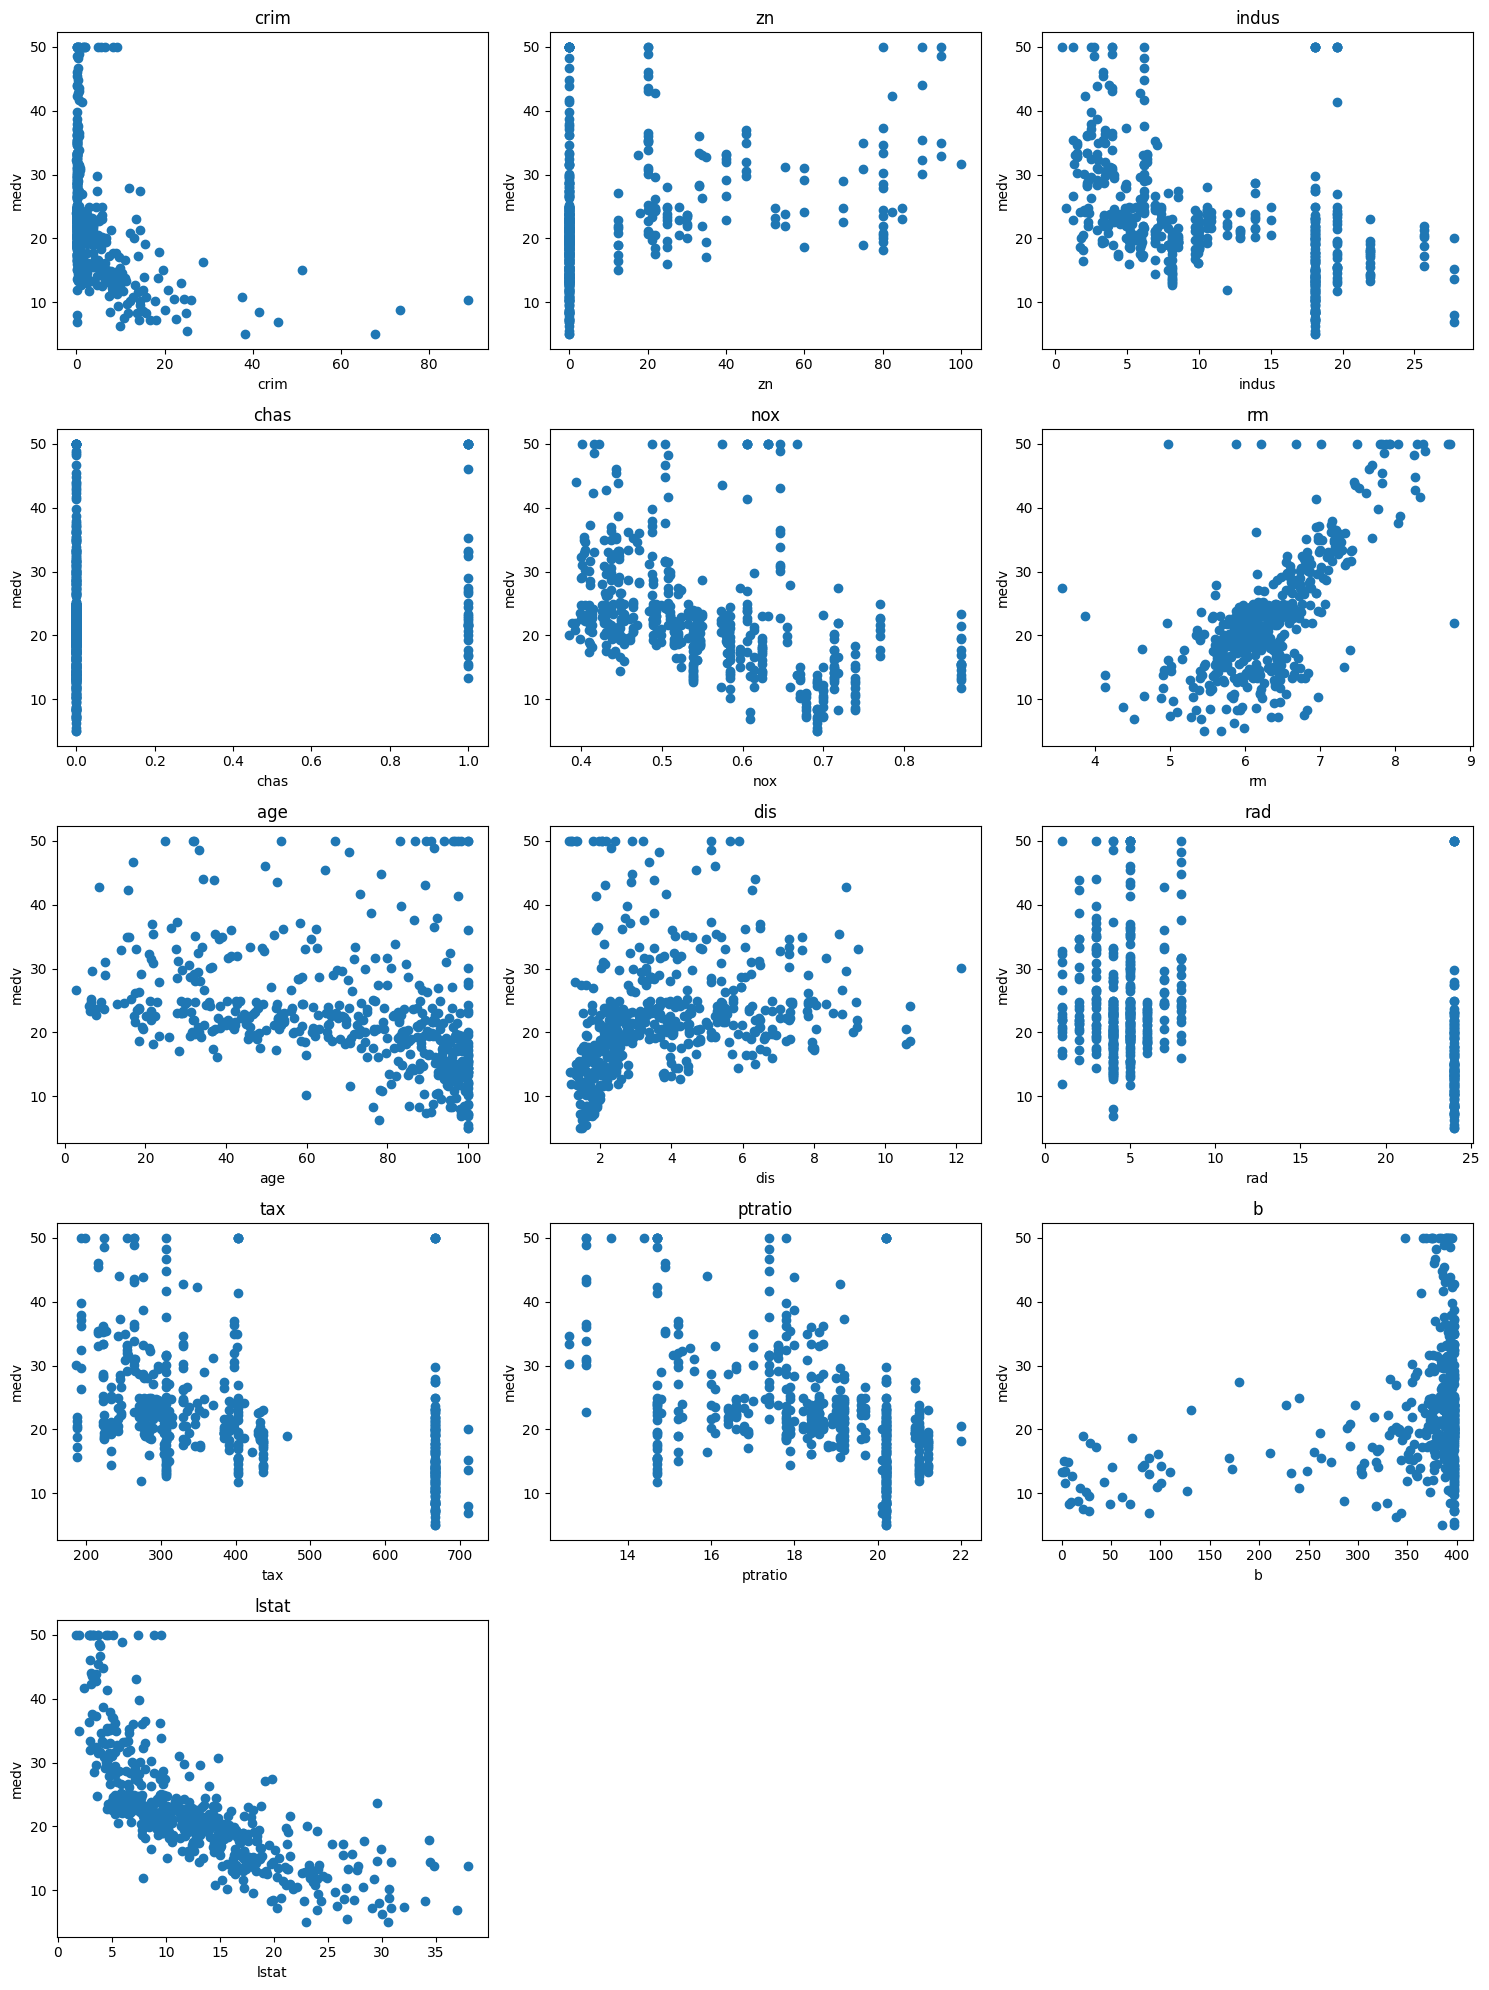

In [12]:
# Create scatter plots
x=1 # index for subplot number
plt.figure(figsize=(15, 20))  # Adjust width and height so they don't come out tiny

for col in housing_df.columns:
    if col != 'medv':  # Skip the column being plotted against
        plt.subplot(5,3,x)
        plt.scatter(housing_df[col],housing_df["medv"])
        plt.title(col)
        plt.ylabel("medv")
        plt.xlabel(col)
        x+=1

# Show Plots
plt.tight_layout()  
plt.show()

### Non-linear relationships 

Linear regression works by fitting the best line to the data. However, looking at the scatter plots of our variables, most of them look like they would be better fit by curves (or like they have no good fit at all). This means that the "best line" isn't going to be very good. We will try to transform the data and see if the resultant graphs have more linear relationships. 

### Natural Logarithm Transformations  

Many natural phenomena have exponential, not linear, relationships and logarithmic, not normal, distributions. When data is right skewed or when it has an exponential (curved) relationships, taking the natural logarithm often helps to "correct" the data and make it more suitable for linear regression. 

Because many of our variables are right skewed and have non-linear relationships, we will try taking the natural logarithm of each variable and then remake our charts. If the transformation seems to improve the variable, then we will use the transformed variable in our model. 

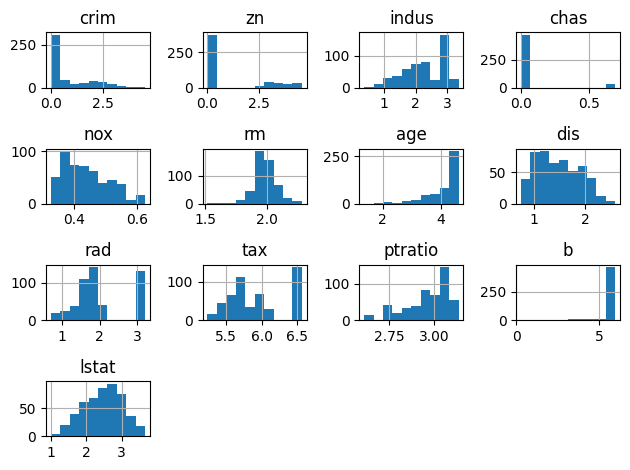

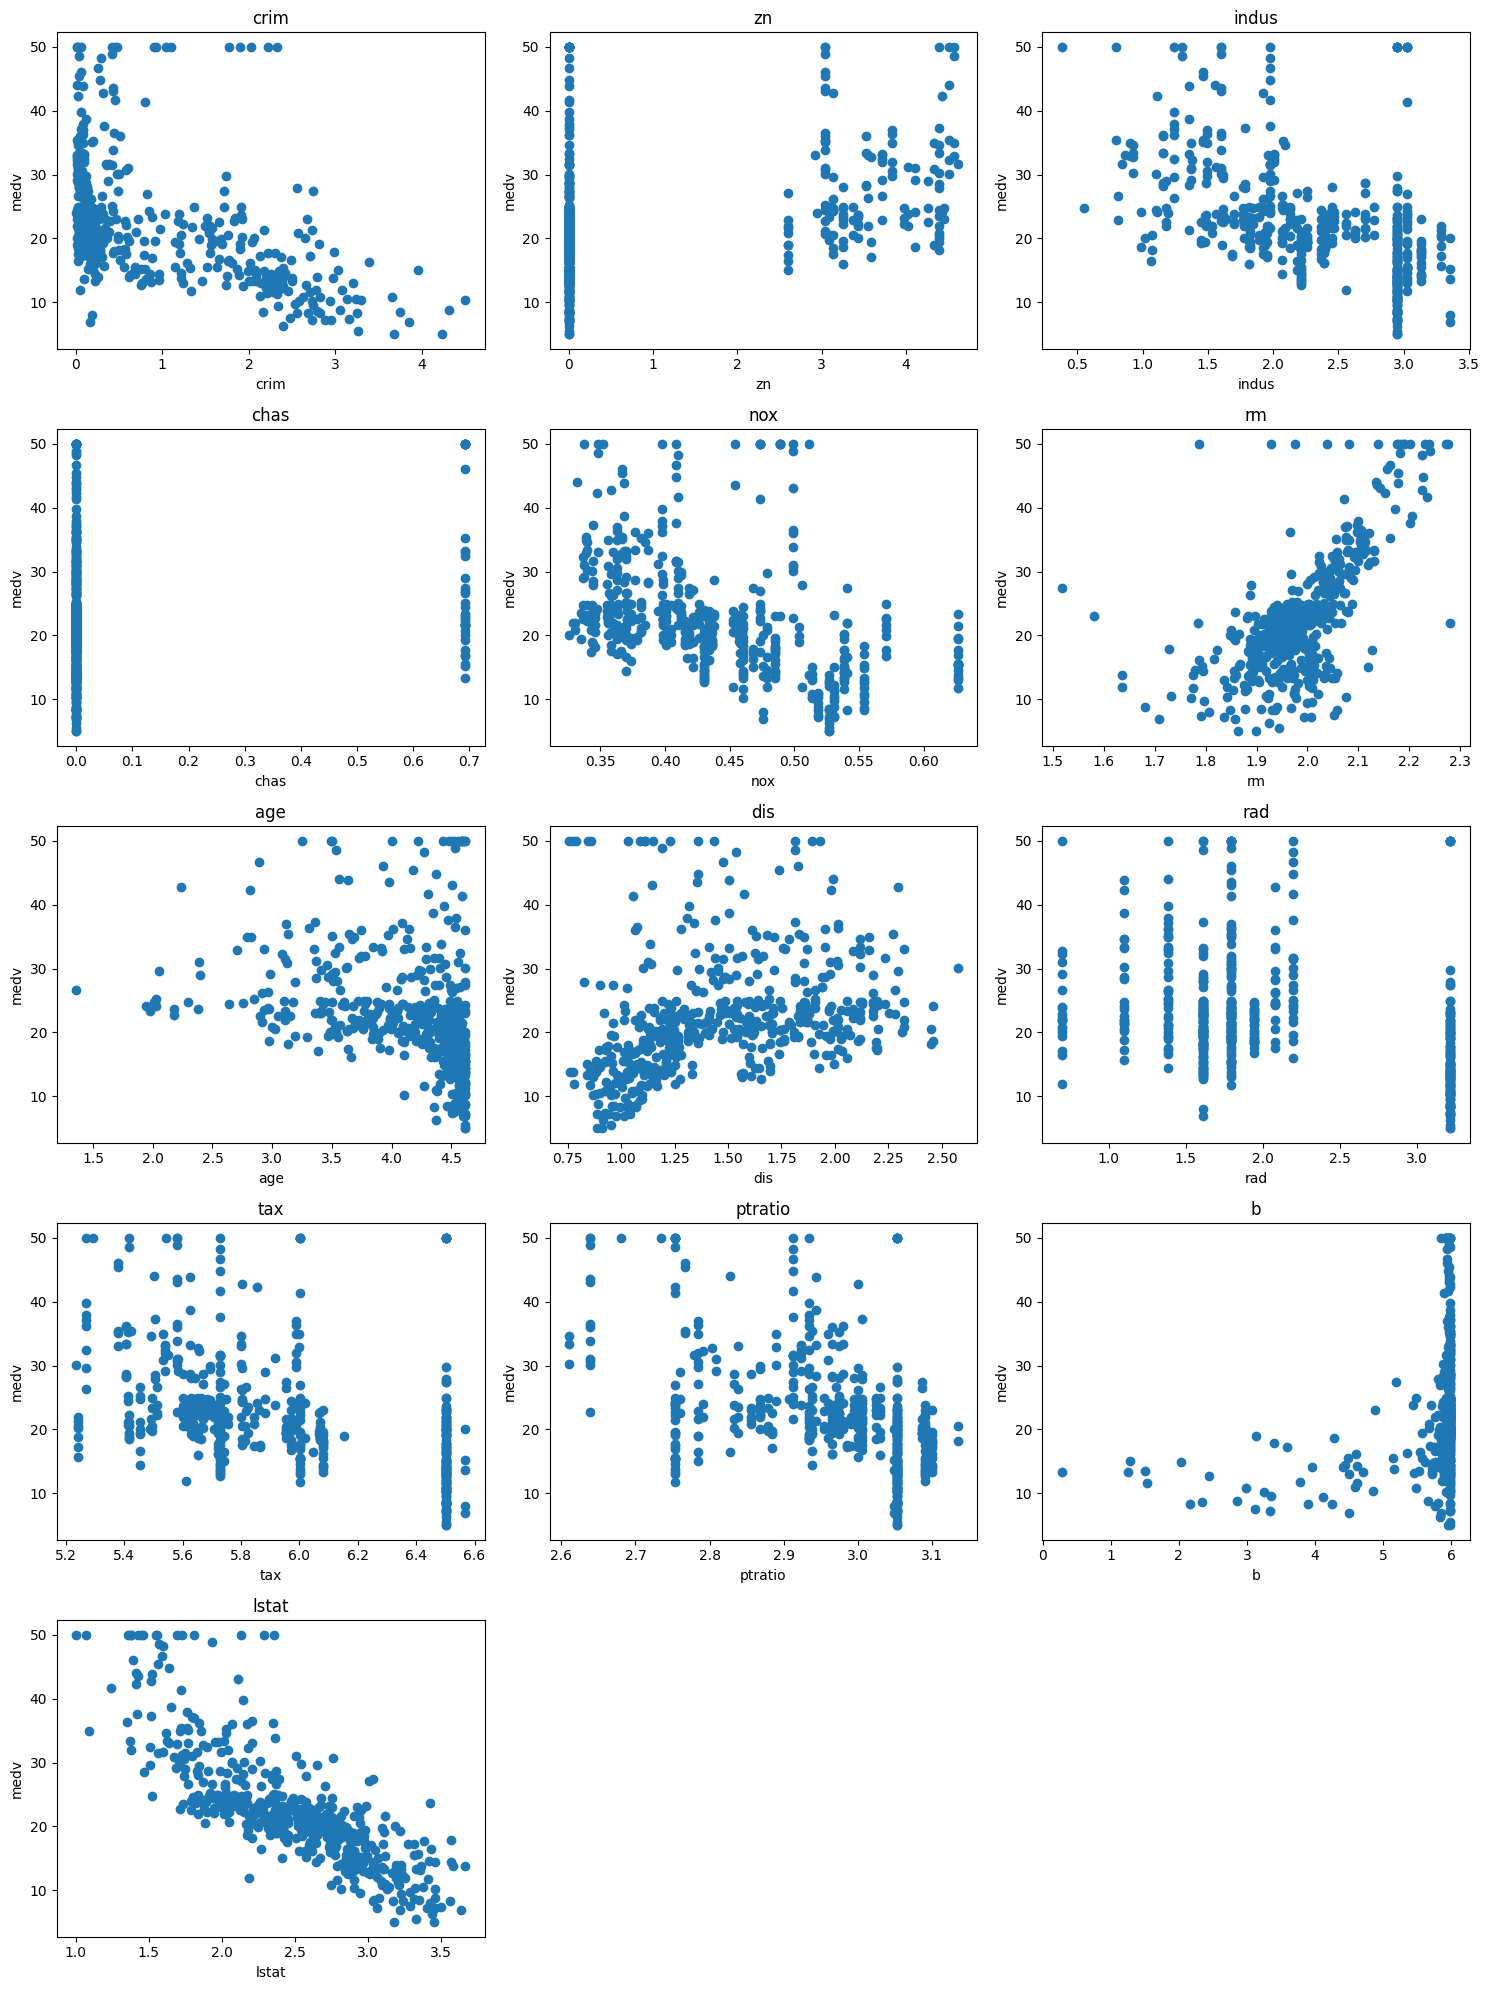

In [13]:
log_df = housing_df.drop(['medv'], axis = 1)    #create a new DataFrame which excludes medv
log_df = np.log(log_df+1)   #transform all columns in the DataFrame with the function ln(x + 1). The +1 is included because some of our variables include 0 and ln(0) is undefined. 

#Look at the Histograms 
log_df.hist(bins = 10)
plt.tight_layout()
plt.show()

# Create scatter plots
x=1 # index for subplot number
plt.figure(figsize=(15, 20))  # Adjust width and height so they don't come out tiny
for col in log_df.columns:
    plt.subplot(5,3,x)
    plt.scatter(log_df[col],housing_df["medv"])    
    plt.title(col)
    plt.ylabel("medv")
    plt.xlabel(col)
    x+=1

# Show Plots
plt.tight_layout()  
plt.show()

The histograms of crim, zn, inuds, age, rad, and dis improved with the transformations. dis and crim also became slightly more linear. We will keep the transformations of these 6 variables and leave the rest. 

There are a few other transformations we could try for the other variables (or to improve these variables more), but with this data they have a fairly low chance of success, so for now we will move on. 

In [14]:
# Pick Variable transformations 
model_df = housing_df   #create new DataFrame
model_df[['crim', 'zn', 'indus', 'age', 'rad', 'dis']] = log_df[['crim', 'zn', 'indus', 'age', 'rad', 'dis']]   #Replace Specified Columns 

## Perform Linear Regression Using statsmodels package
We are now ready (or as ready as we will be) to perform linear regression. 

We will first separate our predictor and response variables by making new dataframes x and y. \
Then we will fit the model using the statsmodels package. 

In [15]:
# Define x and y
y = model_df["medv"]
x = model_df.drop(["medv"], axis=1)  # keep just predictor variables

In [16]:
# Add an intercept 
x_intercept = sm.add_constant(x)
# Fit the Model
model = sm.OLS(y, x_intercept).fit()
# Print the Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          2.91e-138
Time:                        23:16:32   Log-Likelihood:                -1490.8
No. Observations:                 506   AIC:                             3010.
Df Residuals:                     492   BIC:                             3069.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.1859      5.758      8.368      0.0

## Model Summary & Model Selection
The model summary tells us about our model and how well it is performing. \
Of special interest is the $R^2$ value, the coefficients, P statistics, and the multicollinearity warning. 

### $R^2$
$R^2$ ranges from 0 to 1 and is a measure of how "good" our model is. It is the percentage of variance in y (the value we are predicting) explained by x (our predictor variables).\
So in this model, we can account for 75% of the variability in medv by looking at the predictor variables (crim, indus, etc), but we cannot account for the other 25%. 

### Coefficients
The coef column lists the coefficients the model has assigned to each of the predictor variables. <br> From them we can build the model equation which is as follows (note that we have rounded to the nearest hundredth and included our variable transformations): 

$ medv = 48.19 - 0.80 * ln(crim+1) + 0.26* ln(zn+1)- 1.54* ln(indus+1) + 3.14*chas - 19.46*nox + 3.86*rm - 0.86*ln(age+1)-10.08*ln(dis+1)+2.73*rad-0.01*tax-0.86*ptratio +0.01*b-0.53*lstat$

The first variable listed, const, is not actually one of our predictors, but is what the model calls the intercept. \
The interpretation of the coefficients is that for each unit increase in the predictor variable, the response, y, is expected to increase by the amount of the coefficient. \
For example, for every unit increase in chas, medv will increase by 3.14.

### P values
The P>|t| column contains the p values. These tell us whether or not our predictor variables contributing significantly to the model. 
The literal interpretation of p is "the probability of observing the given coefficient, or one more extreme, if the predictor variable had no effect on the response."
In more simple phrasing, it is the probability that our predictor variable is useless in predicting the response. 

Generally, predictor variables are only considered "significant" if they have p values less that 0.05 (although 0.1 and other values are also used).\
We will remove crim, zn, and age from our model as they all have p values greater than 0.05.

### Multicollinearity
Note [2] warns that there might be strong multicollinearity. 
Multicollinearity occurs when two or more of the predictor variables are strongly correlated with each other, essentially measuring the same attribute. \
This causes a scenario where several very different models could all give similar predictions causing issues in interpretability.

For example, take predictors A and B which are strongly correlated with each other and positively correlated with the response such that either variable by itself would have a coefficient of around 80. In this case the models y = 40A + 40B, y = 1A + 79B, or even y = 90A - 10B might all be equally accurate, but each will have a very different interpretation. To avoid this, we often try to remove any multicollinearity. 

After removing the insignificant predictors, we will run a correlation matrix on the remaining variables to see which might be multicollinear. 

NOTE: If all you care about is the accuracy of your model, there is no reason to worry about multicollinearity. However, if you want to be able to interpret the coefficients of your model and if you care about your model being as simple as possible, these are good steps to take. 

In [17]:
###### Drop insignificant predictors and rerun model #######
x2 = x.drop(["crim", "zn", "age"], axis = 1)

# Add an intercept 
x_intercept2 = sm.add_constant(x2)
# Fit the Model
model2 = sm.OLS(y, x_intercept2).fit()
# Print the Model Summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          4.62e-140
Time:                        23:16:32   Log-Likelihood:                -1494.1
No. Observations:                 506   AIC:                             3010.
Df Residuals:                     495   BIC:                             3057.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4862      5.464      8.507      0.0

Despite removing three predictors, the $R^2$ of our model barely dropped. This means we have simplified our model without losing predictive power, yeah!!

Now we will go back and look at multicollinearity by generating a correlation matrix for our remaining predictors. 

In [18]:
cor_matrix2 = x2.corr() #run correlation matrix
cor_matrix2.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).format("{:.3f}")  #produce correlation matrix table with 

,indus,chas,nox,rm,dis,rad,tax,ptratio,b,lstat
indus,1.000,0.080,0.740,-0.429,-0.741,0.590,0.682,0.428,-0.341,0.607
chas,0.080,1.000,0.091,0.091,-0.089,0.009,-0.036,-0.122,0.049,-0.054
nox,0.740,0.091,1.000,-0.302,-0.824,0.605,0.668,0.189,-0.380,0.591
rm,-0.429,0.091,-0.302,1.000,0.244,-0.202,-0.292,-0.356,0.128,-0.614
dis,-0.741,-0.089,-0.824,0.244,1.000,-0.540,-0.605,-0.240,0.322,-0.550
rad,0.590,0.009,0.605,-0.202,-0.540,1.000,0.873,0.427,-0.423,0.470
tax,0.682,-0.036,0.668,-0.292,-0.605,0.873,1.000,0.461,-0.442,0.544
ptratio,0.428,-0.122,0.189,-0.356,-0.240,0.427,0.461,1.000,-0.177,0.374
b,-0.341,0.049,-0.380,0.128,0.322,-0.423,-0.442,-0.177,1.000,-0.366
lstat,0.607,-0.054,0.591,-0.614,-0.550,0.470,0.544,0.374,-0.366,1.000


Are two strongest mullticolinear pairs are rad & tax and dis & nox. However, there are also some larger multicolinear groups, namely nox, indus, rad, & tax, and dis, nox, & indus. <br> 
Hopefully we can exclude some of these without losing major predictive power. 

Looking back, all of these variables had an absolute correlation of around .45 with medv, except for rad at .38 and dis at .24. Therefore, dropping rad and dis might have less effect on our model's accuracy than other values. However, it is also worthwhile to look at what each variable is actually measuring. If certain variables are easier to measure or make more sense in the context of the problem, it might be better to keep them.  

Here is what each of the variables measure:

INDUS - proportion of non-retail business acres per town.\
NOX - nitric oxides concentration (parts per 10 million)\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\

Both RAD and TAX measure interesting variables. However we are more curious about the effect of access to highways, so we decide to leave in RAD and take out TAX. <br>
It seems like NOX might be a bit hard to measure in some areas, so we decide to take that out. <br>
Indus was multicollinear with both other groups so we will take it out as well. 




In [19]:
###### Drop MultiColinear Variables and ReRun #######
x3 = x2.drop(["nox", "tax", "indus"], axis = 1)

# Add an intercept 
x_intercept3 = sm.add_constant(x3)
# Fit the Model
model3 = sm.OLS(y, x_intercept3).fit()
# Print the Model Summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          1.99e-129
Time:                        23:16:32   Log-Likelihood:                -1527.2
No. Observations:                 506   AIC:                             3070.
Df Residuals:                     498   BIC:                             3104.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6892      4.401      4.474      0.0

Our model is much more simple now, but we did lose some predictive power with our R-square dropping to 0.71. We could go back and try removing a different subset of variables if we are concerned about this decrease. 

## Using Our Model to Predict 

Now that we have selected a final model we want to use it to predict medv for new x values. \
The data we feed it will need to be in the same form as the x3 dataframe we used to train the model.\
We will also need to add an intercept to the data just as we did when training the model and make sure to apply transformations. 

**Note:** you could also calculate points manually by using the coefficients to create the model equation

We also generate a confidence interval for our prediction using the .conf_int(alpha=) method. This returns a confidence interval corresponding to the specified value of alpha (the significance level). The interpretation of this is that for the given input (the specified chas, rm, dis, etc.) there is a (1-alpha)*100% chance that the output (medv) would be within the reported range. <br>
Below we use alpha = 0.1, so there is a 90% chance that the median value of homes for the neighborhood we have described would be between $19,708 and $24,752.

In [20]:
def predict(chas, rm, dis,rad, pratio,b, lstat): 
    # Make an empty dataframe with the same columns as x3 plus a constant
    new_x = pd.DataFrame(columns = x3.columns.insert(0,"const"))

    # Use .loc to add a row, make sure to transform variables
    new_x.loc[0] = [1,chas, rm, np.log(dis+1), np.log(rad+1),pratio,b,lstat ]

    # Get prediction results (including confidence intervals)
    prediction_result = model3.get_prediction(new_x)

    # Get the predictions
    predictions = prediction_result.predicted_mean


    # Get the confidence intervals
    conf_int = prediction_result.conf_int(alpha=0.1)   # alpha is your significance level. 1 - alpha gives your confidence level. If no alpha is specified, alpha = 0.05

    print(f"Predictions for chas = {chas}, rm = {rm}, dis = {dis}, pratio = {pratio}, b = {b}, lstat = {lstat} \nmdev = {predictions} \nConfidence interval {conf_int}")

In [21]:
predict(0,6,.5,0.1,15,300,20)

Predictions for chas = 0, rm = 6, dis = 0.5, pratio = 15, b = 300, lstat = 20 
mdev = [22.2304935] 
Confidence interval [[20.11485047 24.34613654]]


## Generating Mean Squared Error

So far we have use $R^2$ to evaluate our model performance. However, a more general measure of model performance is the Mean Squared Error (MSE). This is calculated exactly as you might guess from the name. You square each error or residual (the difference between your actual data points and your model's predictions) and then take the mean. This statistic will be useful in comparing this model's performance to other models. It is calculated below using the mean_squared_error function imported from sklearn_metrics. 

In [22]:
y_pred = model3.predict(x_intercept3)

# Compute Mean Squared Error
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 24.494317205290237
